Original Data Stationarity Check:
ADF Statistic: -1.901807
p-value: 0.331212
The data is not stationary.

Differenced Data Stationarity Check:
ADF Statistic: -9.620795
p-value: 0.000000
The data is stationary.


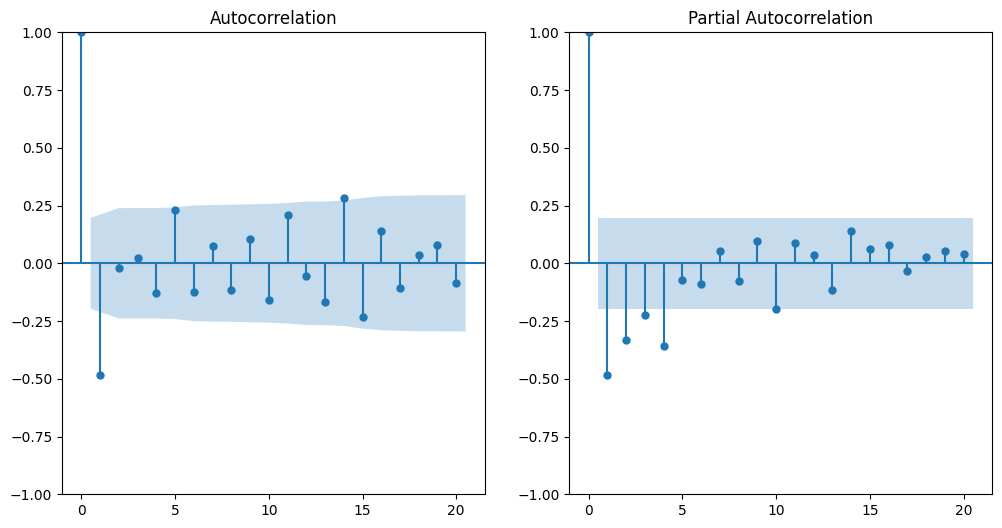

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -140.682
Date:                Sun, 15 Sep 2024   AIC                            287.364
Time:                        22:58:50   BIC                            295.149
Sample:                    01-01-2020   HQIC                           290.514
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0575      0.149     -0.385      0.700      -0.350       0.235
ma.L1         -0.7678      0.087     -8.849      0.000      -0.938      -0.598
sigma2         0.9943      0.148      6.715      0.0

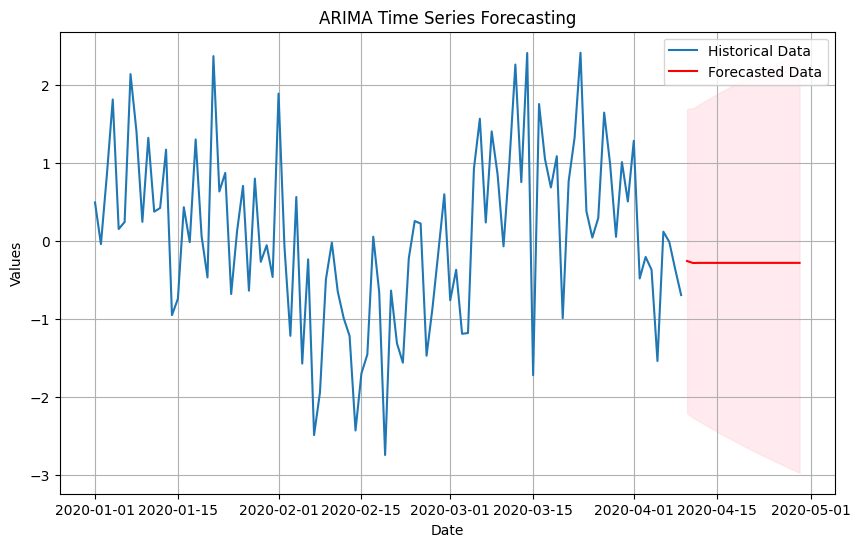

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate synthetic time series data (you can replace this with your actual dataset)
np.random.seed(42)
n = 100
time_series_data = pd.Series(np.sin(0.1 * np.arange(n)) + np.random.normal(size=n),
                             index=pd.date_range('2020-01-01', periods=n))

# Function to check stationarity of time series data
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

# Checking stationarity of original data
print("Original Data Stationarity Check:")
check_stationarity(time_series_data)

# Differencing the data to make it stationary
diff_data = time_series_data.diff().dropna()

# Check stationarity after differencing
print("\nDifferenced Data Stationarity Check:")
check_stationarity(diff_data)

# Plot ACF and PACF to determine AR and MA terms
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(diff_data, ax=plt.gca())
plt.subplot(122)
plot_pacf(diff_data, ax=plt.gca())
plt.show()

# Fit ARIMA model
# Order (p, d, q): p = AR term, d = differencing, q = MA term
arima_order = (1, 1, 1)  # This is an example; adjust based on your ACF/PACF analysis
model = ARIMA(time_series_data, order=arima_order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future values
forecast_steps = 20  # Forecast for the next 20 time periods
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Creating a forecast index for future dates
forecast_index = pd.date_range(time_series_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Convert forecast array to pandas series
forecast_series = pd.Series(forecast_values, index=forecast_index)

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Historical Data')
plt.plot(forecast_series, label='Forecasted Data', color='red')
plt.fill_between(forecast_series.index,
                 confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

